In [64]:
#### REMOVE in README.md ####
import pycoQC as package
from IPython.core.display import display, Markdown, HTML
display(Markdown("# {} {} package documentation\n".format(package.__name__, package.__version__)))
display(Markdown("\n---\n"))
display(Markdown("\n**{}**\n".format(package.setup_dict["description"])))
display(Markdown("\n---\n"))
display(Markdown("{}\n".format(package.setup_dict["long_description"])))
display(Markdown("\n---\n"))
display(Markdown("* Author: {} - {}\n".format(package.setup_dict["author"], package.setup_dict["author_email"])))
display(Markdown("* URL: {}\n".format(package.setup_dict["url"])))
display(Markdown("* Licence: {}\n".format(package.setup_dict["license"])))
display(Markdown("* Python version: {}\n".format(package.setup_dict["python_requires"])))
#############################

# pycoQC 1.1a1 package documentation



---



**
PycoQC is a Python 3 package for Jupyter Notebook, computing metrics and generating simple QC plots
from the sequencing summary report generated by Oxford Nanopore technologies Albacore basecaller
**



---



pycoQC is a very simple quality control package for Nanopore data written in pure **python3**, meant
to be used directly in a **jupyter notebook** 4.0.0 +. As opposed to more exhaustive QC programs for nanopore
data, pycoQC is very fast as it relies entirely on the *sequencing_summary.txt* file generated by ONT Albacore
Sequencing Pipeline Software 1.2.1+, during base calling. Consequently, pycoQC will only provide metrics at read level
metrics (and not at base level). The package supports 1D and 1D2 runs analysed with Albacore.

PycoQC requires the following fields in the sequencing.summary.txt file:

* 1D run => **read_id**, **run_id**, **channel**, **start_time**, **sequence_length_template**, **mean_qscore_template**
* 1D2 run =>**read_id**, **run_id**, **channel**, **start_time**, **sequence_length_2d**, **mean_qscore_2d**

In addition it will try to get the following optional fields if they are available:

* **num_events**, **calibration_strand_genome_template**, **passes_filtering** 



---


* Author: Adrien Leger - aleg@ebi.ac.uk


* URL: https://github.com/a-slide/pycoQC


* Licence: GPLv3


* Python version: >=3.3


# Installation

Ideally, before installation, create a clean python3 virtual environment to deploy the package, using virtualenvwrapper for example (see http://www.simononsoftware.com/virtualenv-tutorial-part-2/).

In [65]:
#### REMOVE in README.md ####
import pycoQC as package
from IPython.core.display import display, Markdown
if "install_requires" in package.setup_dict:
    display(Markdown("## Required packages:\n"))
    for dep in package.setup_dict["install_requires"]:
        display(Markdown("* {}\n".format(dep)))
#############################

## Required packages:


* numpy>=1.13.0


* pandas>=0.20.0


* matplotlib>=2.0.0


* seaborn>= 0.7.0


* notebook>=4.0.0


## Option 1: Direct installation with pip from github (recommended)

Install the package with pip3. All the required dependencies will be automatically installed.

`pip3 install git+https://github.com/a-slide/pycoQC.git`
   
To update the package:

`pip3 install git+https://github.com/a-slide/pycoQC.git --upgrade`
    

## Option 2: Clone the repository and install locally in develop mode

With this option, the package will be locally installed in “editable” or “develop” mode. This allows the package to be both installed and editable in project form. This is the recommended option if you wish to participate to the development of the package. As for the option before, the required dependencies will be automatically installed.

`git clone https://github.com/a-slide/pycoQC.git`

`cd pycoQC`

`chmod u+x setup.py`

`pip3 install -e ./`

With this option you can also run the testing notebook located in the source directory *pycoQC/test_pycoQC.ipynb*

## Option 3: Local installation without pip (not recommended)

This option is also suitable if you are interested in further developing the package, but requires a little bit more hands-on.

Clone the repository locally

`git clone https://github.com/a-slide/pycoQC.git`
    
* Add the package directory (./pycoQC/pycoQC) to you python3 PATH (depending on you OS and whether you want it to be permanent ot not)

* Install the dependencies (numpy, pandas, matplotlib, seaborn and notebook)

`pip3 install numpy pandas matplotlib seaborn notebook`

# Usage

The package is meant to be used in a jupyter notebook 4.0.0 +

### Running jupyter in a virtualenv (optional)

If you installed the package in a virtual environment with virtualenvwrapper, jupyter can run the virtualenv as a kernel as explained here http://help.pythonanywhere.com/pages/IPythonNotebookVirtualenvs

## Notebook setup

Launch the notebook in a terminal

`jupyter notebook`

If it does not autolaunch your web browser, open manually the following URL http://localhost:8888/tree

From Jupyter home page you can navigate to the directory you want to work in. Then, create a new Python3 Notebook.

In the notebook, import matplotlib and use the jupyter magic command to enable direct plotting in the current Notebook.

Using the svg format as a backend for matplotlib will generate beautiful vector plots, but is CPU/memory hungry, particularly for the 2D scatter plot

In [66]:
import matplotlib.pyplot as pl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

One can also tweak the pandas output to enlarge the dataframes for the tabular data generated by pycoQC

In [25]:
import pandas as pd
pd.options.display.max_colwidth = 200

Default pylab parameters can be defined at the beginning of the notebook as well (see http://matplotlib.org/users/customizing.html for more options)

In [67]:
pl.rcParams['figure.figsize'] = 20,7
pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['font.sans-serif'] = ['DejaVu Sans']

## General package information

pycoQC is a simple class that is initialized with a sequencing_summary file generated by Albacore 1.2.1 +.

The instantiated object can be subsequently called with various methods that will generates tables and plots

Each function has specific options that are comprehensively detailed in the test notebook provided with the package or in directly on Github: [Test_notebook](https://github.com/a-slide/pycoQC/blob/master/pycoQC/test_pycoQC.ipynb)

Most of the plotting functions return a matplotlib fig, ax tuple. This allows users to further customize the plotting areas thanks to the numerous set methods associated with the object (for instance Axes.set_axis_off, Axes.set_xlim, Axes.set_xscale...). 
Extensive information is available in the Matplotlib API documentation: http://matplotlib.org/api/axes_api.html.

All the plotting functions can take a [matplotlib "style"](https://matplotlib.org/users/style_sheets.html) option. To list all available styles in your environment, use:

In [68]:
print(pl.style.available)

['seaborn-talk', 'dark_background', 'seaborn-white', 'seaborn', 'seaborn-dark', 'seaborn-whitegrid', 'fivethirtyeight', 'seaborn-notebook', 'seaborn-darkgrid', 'seaborn-dark-palette', 'seaborn-bright', 'Solarize_Light2', 'seaborn-muted', 'seaborn-colorblind', 'grayscale', 'fast', 'seaborn-paper', 'seaborn-pastel', '_classic_test', 'seaborn-poster', 'seaborn-ticks', 'bmh', 'seaborn-deep', 'classic', 'ggplot']


## Import the package

In [69]:
from pycoQC.pycoQC import pycoQC

One can also import the jprint and jhelp function from pycoQC to get a improve the default print and help function in jupyter.

In [70]:
from pycoQC.pycoQC_fun import jhelp, jprint

*jhelp* Can be used to provide a full description of the pycoQC functions using the *full* option.

In [71]:
jhelp(pycoQC.reads_qual_bins, full=True)

Count the number of reads per interval of sequence quality and return a dataframe

* bins: LIST [Default [-1,0,2,4,6,8,10,12,14,16,18,20,40]]

Limits of the intervals as a list

 Or alternatively one can also use the jupyter magic "?" 

In [31]:
?pycoQC.reads_qual_bins

A sample test file previously generated by Albacore are provided with the package. They can be listed using the following function

In [72]:
df = pycoQC.example_data_files()
display(df)

,path,description
1D_DNA_1.2.1,/home/aleg/Programming/Python3/pycoQC/pycoQC/d...,Sequencing summary file generated by a 1D_DNA ...
1D_RNA_2.0.1,/home/aleg/Programming/Python3/pycoQC/pycoQC/d...,Sequencing summary file generated by a 1D_RNA ...
1D2_DNA_1.2.1,/home/aleg/Programming/Python3/pycoQC/pycoQC/d...,Sequencing summary file generated by a 1D2_DNA...


I recommend using of of theses files to test pycoQC, but you can obviously use your own files instead

## Initialize pycoCQ

In [41]:
jhelp (pycoQC.__init__)

Parse Albacore sequencing_summary.txt file and clean-up the data

### Basic initialization

In [73]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt", verbose=True)

### Initialization with runids reordering

If several runids are present in the file, pycoQC will order the runids bases on their order in the file, which does not always correspond to the sequencing order. Unfortunately their is no way to know the right order based on the information contained in the *sequencing_summary.txt* file alone. However if you know the order you can specify it at initialisation (or even  exclude specific runids).

In [74]:
runid_list = ["7082b6727942b3939a023beaf03ef24cec1722e5", "ad3de3b63de71c4c6d5ea4470a82782cf51210d9"]
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt", runid_list=runid_list, verbose=True)

### Initialization with read filtering 

Some reads are not "basecallable" and consequently have a length of zero. These reads can be filtered out with the option *filter_zero_len*.

Starting from Albacore 2.0, ONT introduced additional fields in the *sequencing_summary.txt* to flag sequences that did not meet the quality requirements and sequences aligned on the internal control. These sequences can be filtered out with the options *filter_calibration* and *filter_fail*.

In [75]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", filter_calibration=True, filter_fail=True, filter_zero_len=True, verbose=True)

## Generate an overview of the data

In [76]:
jhelp(pycoQC.overview)

Generate a quick overview of the data (tables + plots)

,Count
Reads,5.000000e+04
Bases,4.598551e+08
Events,8.422545e+08
Active Channels,5.070000e+02
Run Duration (h),4.779043e+01


,reads
ad3de3b63de71c4c6d5ea4470a82782cf51210d9,49603
7082b6727942b3939a023beaf03ef24cec1722e5,397


,Quality score distribution,Read length distribution
count,50000.000000,50000.000000
mean,11.018961,9197.102300
std,2.093471,12475.543239
min,2.784000,5.000000
10%,7.720000,744.000000
25%,9.546000,2067.000000
50%,11.552000,3516.000000
75%,12.692000,10581.250000
90%,13.316000,28132.200000
max,15.255000,49902.000000


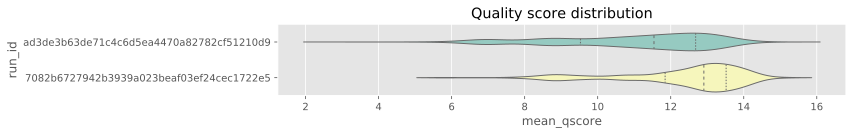

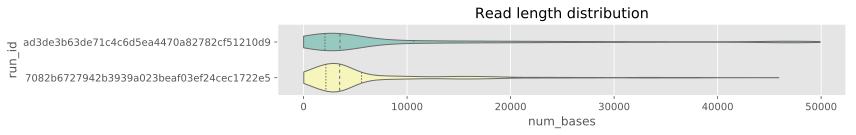

In [77]:
## You don't need to initialize pycoQC every times. But for this tutorial I will do it to show the output obtained with different example files
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt")
g = p.overview (cmap='Set3', plot_style='ggplot')

## Analyse the mean read quality distribution

pycoQC can generate a mean read quality score as a Dataframe or as a kernel density distribution plot

### reads_qual_bins

In [78]:
jhelp(pycoQC.reads_qual_bins)

Count the number of reads per interval of sequence quality and return a dataframe

In [79]:
## Again you don't need to initialize pycoQC every times. But if you missed it before, for this tutorial I will do it to show the output obtained with different example files
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D2_DNA_Albacore_1.2.1.txt", filter_zero_len=True)
p.reads_qual_bins( bins=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 40])

,Count
Sequence quality ranges,
"(0, 2]",0
"(2, 4]",1
"(4, 6]",36
"(6, 8]",104
"(8, 10]",385
"(10, 12]",2420
"(12, 14]",3606
"(14, 16]",2100
"(16, 18]",1112


### reads_qual_distribution

In [80]:
jhelp(pycoQC.reads_qual_distribution)

Plot the univariate kernel density estimate of mean read quality

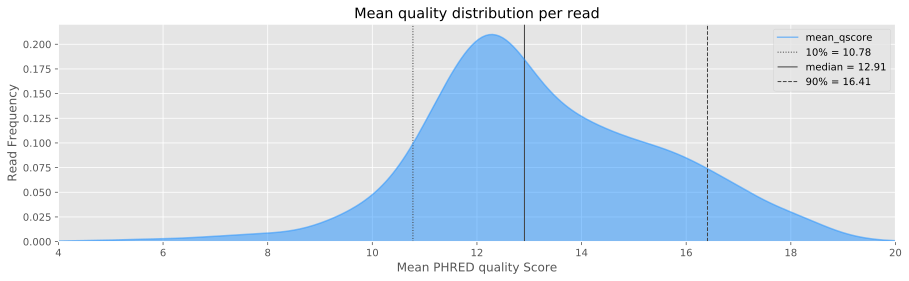

In [81]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D2_DNA_Albacore_1.2.1.txt", filter_zero_len=True)
g = p.reads_qual_distribution (figsize=[15, 4], color='dodgerblue', alpha=0.5, bandwith=0.5, sample=100000, min_qual=4, max_qual=20, plot_style='ggplot', )

## Analyse the read length distribution

Similarly pycoQC can also compute the read length distribution as a Dataframe or as a kernel density distribution plot

### reads_len_bins

In [82]:
jhelp(pycoQC.reads_len_bins)

Count the number of reads per interval of sequence length and return a dataframe

In [83]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt", filter_zero_len=True)
p.reads_len_bins(bins=[0, 10, 25, 50, 100, 500, 1000, 5000, 10000, 100000, 10000000])

,Count
Sequence lenght ranges,
"(0, 10]",27
"(10, 25]",50
"(25, 50]",65
"(50, 100]",152
"(100, 500]",2172
"(500, 1000]",4705
"(1000, 5000]",25188
"(5000, 10000]",4705
"(10000, 100000]",12936


### reads_len_distribution

In [84]:
jhelp(pycoQC.reads_len_distribution)

Plot the univariate kernel density estimate of read length in base pairs

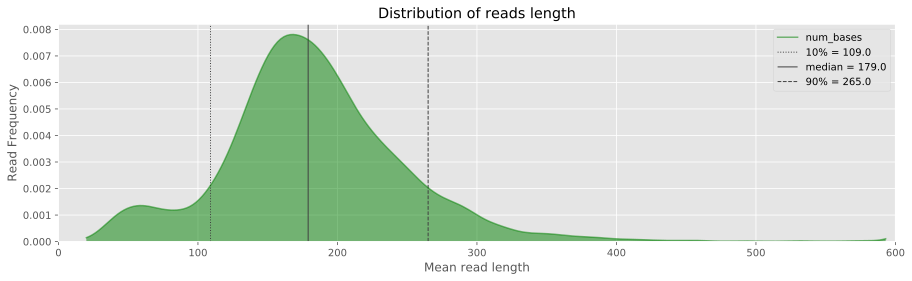

In [85]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", filter_zero_len=True, filter_calibration=True, filter_fail=True)
fig, ax = p.reads_len_distribution(figsize=[15,4], color='green', alpha=0.5, min_len=0, max_len=600, plot_style='ggplot')

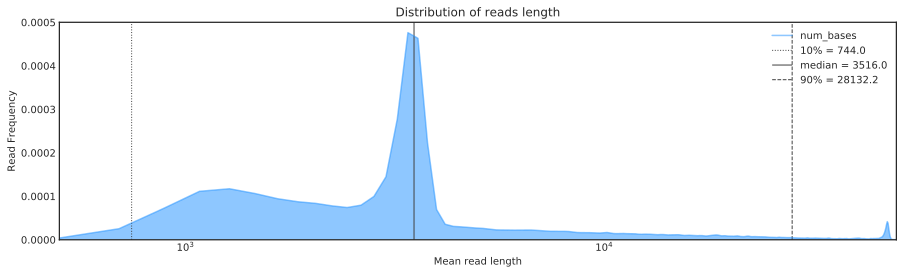

In [86]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt", filter_zero_len=True)
fig, ax = p.reads_len_distribution(figsize=[15,4], color='dodgerblue', alpha=0.5, min_len=500, xlog=True, plot_style='seaborn-white')

## Generate a 2D distribution of read length and mean quality score

In [87]:
jhelp(pycoQC.reads_len_quality)

Draw a bivariate plot of read length vs mean read quality with marginal univariate plots.

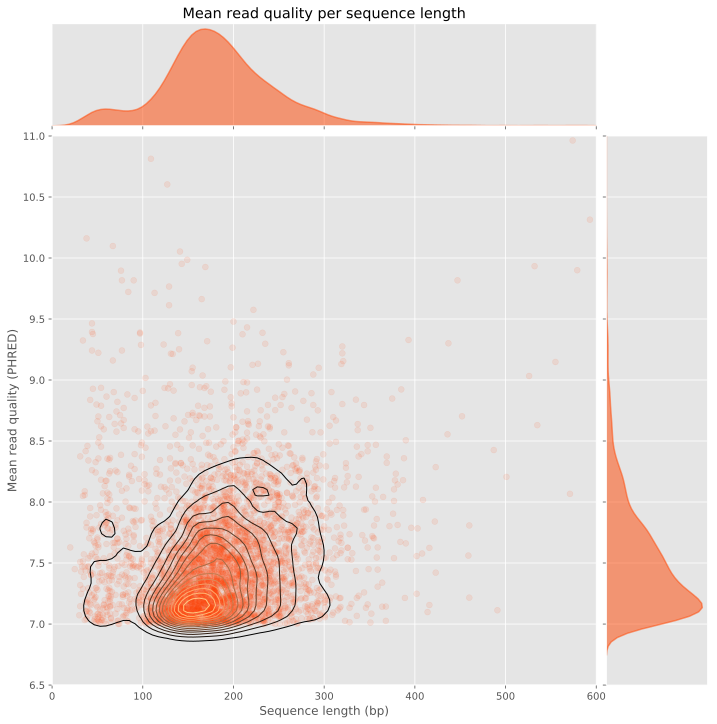

In [88]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", filter_calibration=True, filter_fail=True, filter_zero_len=True)
g = p.reads_len_quality (figsize=10, kde=True, scatter=True, margin_plot=True, kde_levels=15, min_len=0, max_len=600, min_qual=6.5, max_qual=11, scatter_alpha=0.1)

## Analyse the reads/bases/events output over the time of the run

In [89]:
jhelp(pycoQC.output_over_time)

Plot the output over the time of the experiment at read, base or event level

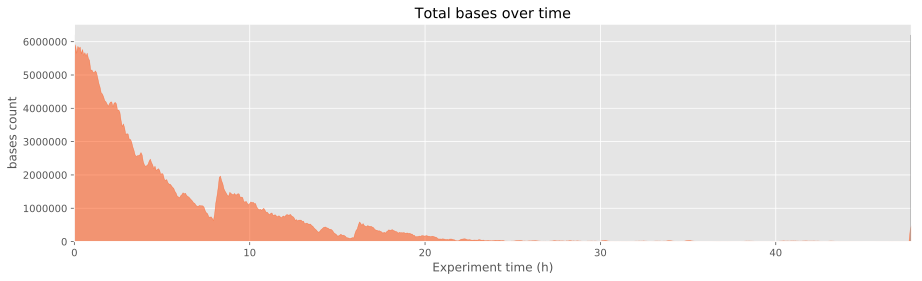

In [90]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt", filter_zero_len=True)
g = p.output_over_time(level='bases', figsize=[15, 4], bin_size=240, bin_smothing=5)

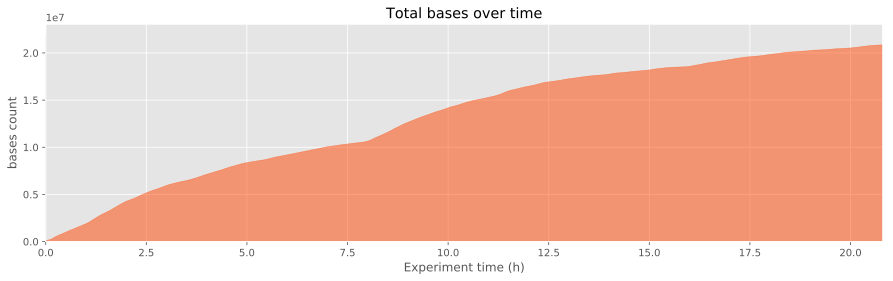

In [68]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D2_DNA_Albacore_1.2.1.txt", filter_zero_len=True)
g = p.output_over_time(level='bases', figsize=[15, 4], color='orangered', cumulative=True)

## Analyse the evolution of the mean read quality over the time of the run

In [91]:
jhelp(pycoQC.quality_over_time)

Plot the evolution of the mean read quality over the time of the experiment

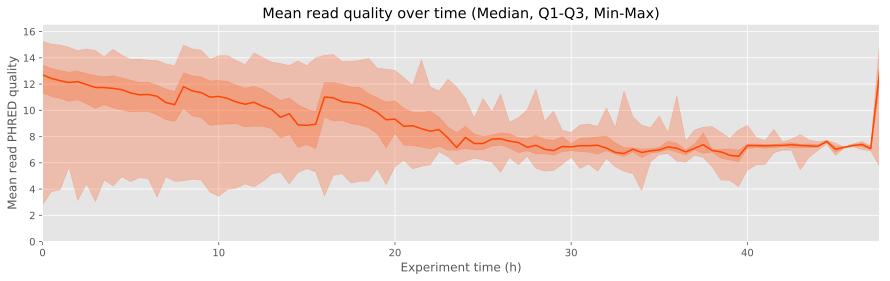

In [92]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt", filter_zero_len=True)
g = p.quality_over_time(figsize=[15, 4], win_size=0.5)

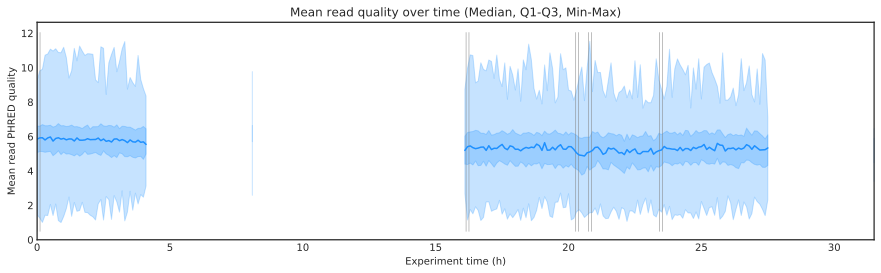

In [77]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", filter_zero_len=True)
g = p.quality_over_time(runid_lines=True, figsize=[15, 4], color='dodgerblue', win_size=0.1, plot_style='seaborn-white')

## Overview of the activity of flowcell channels

In [93]:
jhelp(pycoQC.channels_activity)

Plot the activity of channels at read, base or event level. The layout does not represent the physical layout

of the flowcell based on seaborn heatmap funtion

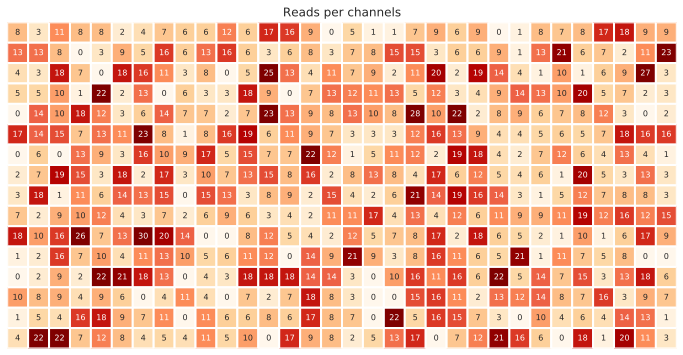

In [81]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", filter_zero_len=True, filter_fail=True)
g = p.channels_activity(level='reads', figsize=[12,6])

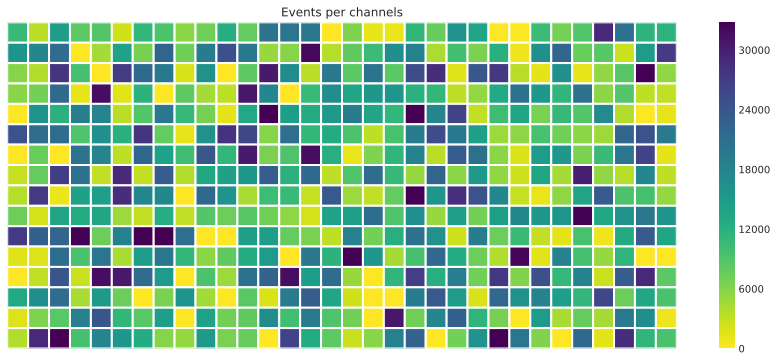

In [94]:
p = pycoQC("/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", filter_zero_len=True, filter_fail=True)
g = p.channels_activity(level='events', cmap="viridis_r", cbar=True, annot=False, figsize=[15,6])

# Note to power-users and developers

Please be aware that pycoQC is an experimental package that is still under development. It was tested under Linux Ubuntu 16.04 and in an HPC environment running under Red Hat Enterprise 7.1.

You are welcome to contribute by requesting additional functionalities, reporting bugs or by forking and submitting patches or updates pull requests

Thank you

### Contributors

Jon Sanders [Github](https://github.com/tanaes)

### Acknowledgments

Thanks to [Kim Judge](https://twitter.com/kim_judge_) for providing a few example sequencing summary files.